# Circular Loop

In [5]:
import emulatte.forward as fwd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# emulatte
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [0, 0, 0]
freq = np.logspace(-1, 6, 500)
props = {'res': res}

model = fwd.model(thicks)
model.set_properties(**props)
cl = fwd.transmitter('CircularLoop', freq, current=1, radius=50, turns=1)
model.locate(cl, sc, rc)
em, _ = model.emulate(hankel_filter='key201')
hz = em['h_z']

# empymod

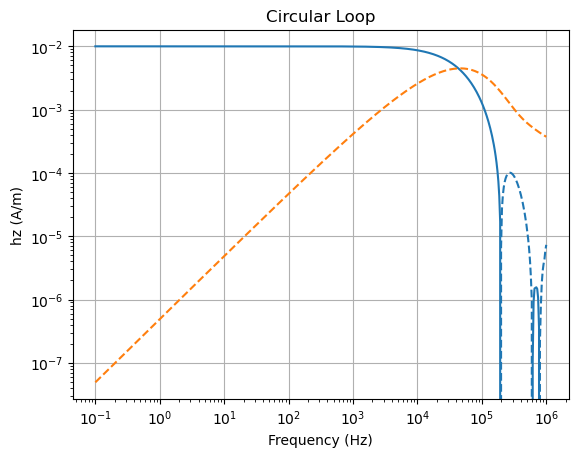

In [11]:
plt.figure()
plt.title('Circular Loop')
plt.loglog(freq, hz.real, 'C0-')
plt.loglog(freq, -hz.real, 'C0--')
plt.loglog(freq, hz.imag, 'C1-')
plt.loglog(freq, -hz.imag, 'C1--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('hz (A/m)')
plt.grid()
plt.show()
